In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("26-customer_data.csv")

In [9]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


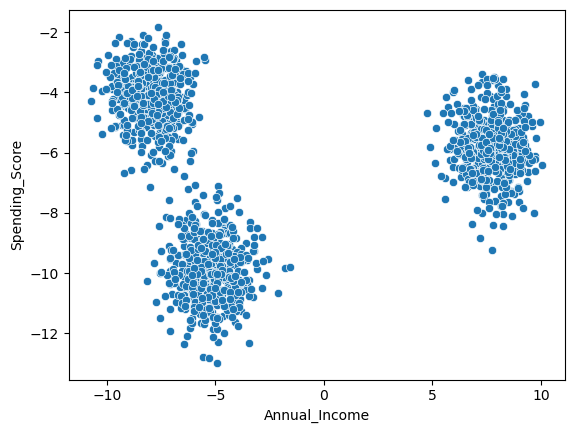

In [13]:
sns.scatterplot(data=df, x="Annual_Income",y="Spending_Score")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
X_train

,Annual_Income,Spending_Score
382,-9.052239,-5.614414
538,-5.381522,-9.977264
1492,-6.082531,-8.140377
1112,6.992077,-5.493719
324,8.465084,-5.493865
...,...,...
1130,-8.125773,-5.588273
1294,7.956970,-5.709210
860,7.793268,-4.732170
1459,-7.757835,-6.272399


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.cluster import KMeans

In [25]:
#elbow method
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
wcss

[198.30484840155,
 69.32365724252246,
 11.773787897869422,
 10.022093361824876,
 9.256984396918257,
 6.148103419821297,
 5.640945333667882,
 4.908461158295863,
 4.602704144847656,
 4.1330151293881805]

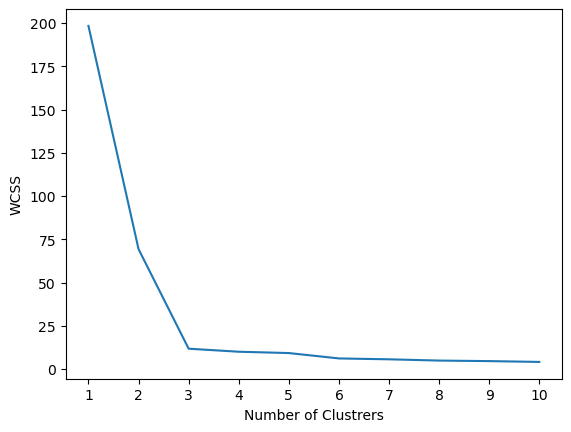

In [31]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3)

In [35]:
kmeans.fit(X_train_scaled)

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
y_pred=kmeans.predict(X_test_scaled)

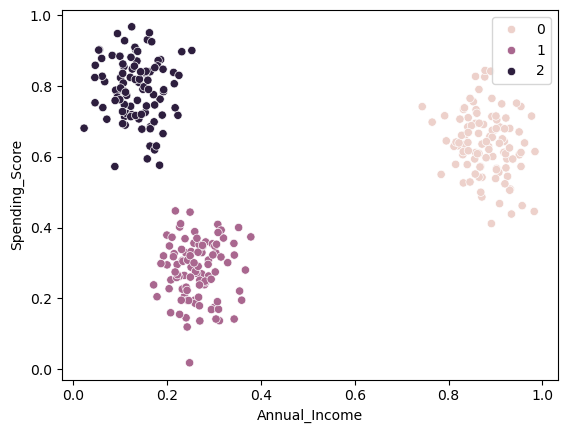

In [39]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns=X_test.columns), x="Annual_Income", y="Spending_Score", hue=y_pred)
plt.show()

In [41]:
## Alternative ways to validate the k value
## kneelocator

In [43]:
!pip install kneed

In [47]:
from kneed import KneeLocator

In [49]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") #make sure you specify convex or concave in curve

In [51]:
kl.elbow

np.int64(3)

In [53]:
# Other alternative
# silhoutte score
from sklearn.metrics import silhouette_score

In [55]:
silhouette_coefficients=[]
for k in range(2,11): # it needs at least 2 cluster labels so we are not trying 1
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_) 
    silhouette_coefficients.append(score)

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [57]:
silhouette_coefficients

[np.float64(0.48288035002021884),
 np.float64(0.7860072644571928),
 np.float64(0.6462353351013628),
 np.float64(0.496715316337084),
 np.float64(0.4714371888071724),
 np.float64(0.3744833273136638),
 np.float64(0.3534986361717143),
 np.float64(0.34080185021475934),
 np.float64(0.3506733852767429)]

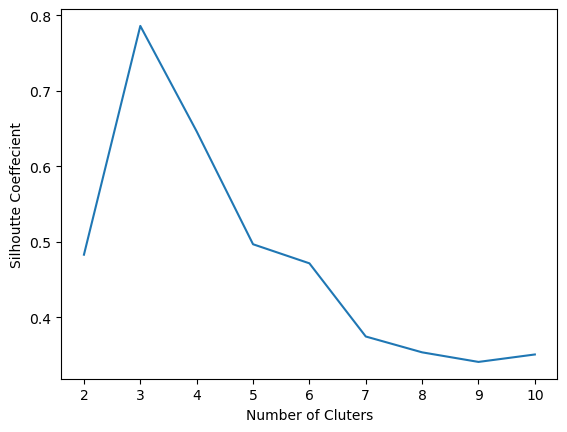

In [59]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()